In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [2]:
experiments = glob.glob(os.getcwd() + '/experiments/*')

## AUC ROC, AUC PR e CLL

In [ ]:
# '+/-' + str(round(exp['CLL'].std(),3)

In [7]:
df = pd.DataFrame(columns=['experiment', 'CLL', 'AUC ROC', 'AUC PR'])
for experiment in experiments:
    try:
        exp = pd.read_csv(experiment + '/all_folds.txt')
        df = df.append({'experiment': experiment.split('\\')[-1], 
                   'CLL': str(round(exp['CLL'].mean(),3)),
                   'AUC ROC': str(round(exp['AUC ROC'].mean(),3)),
                   'AUC PR': str(round(exp['AUC PR'].mean(),3)),
                   'Total Learning Time': str(round(exp['Total Learning Time'].mean(),3))}, ignore_index=True)
    except FileNotFoundError as e:
        print(e)

[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/all_folds.txt' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/all_folds.txt'


## Confusion Matrix

In [8]:
cm = pd.DataFrame(columns=['TP', 'FP', 'TN', 'FN'])
for experiment in experiments:
    try:
        exp = pd.read_csv(experiment + '/confusion_matrix.txt')
        cm = cm.append({'experiment': experiment.split('\\')[-1], 
                   'TP': str(round(exp['TP'].mean(),3)),
                   'FP': str(round(exp['FP'].mean(),3)),
                   'TN': str(round(exp['TN'].mean(),3)),
                   'FN': str(round(exp['FN'].mean(),3))}, ignore_index=True)
    except FileNotFoundError as e:
        print(e)

[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/confusion_matrix.txt' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/confusion_matrix.txt'
[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\4_cora_imdb/confusion_matrix.txt' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\4_cora_imdb/confusion_matrix.txt'
[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\6_cora_uwcse/confusion_matrix.txt' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\6_cora_uwcse/confusion_matrix.txt'


In [9]:
cm

,TP,FP,TN,FN,experiment
0,262.667,266.667,0.0,0.0,10_nell_finances_nell_sports
1,561.0,561.0,0.0,0.0,11_yeast_webkb
2,90.4,90.4,0.0,0.0,1_imdb_uwcse
3,305.6,305.6,0.0,0.0,2_uwcse_imdb
4,2135.4,2470.2,0.0,0.0,3_imdb_cora
5,2135.4,2470.2,0.0,0.0,5_uwcse_cora
6,141.0,141.0,0.0,0.0,7_yeast_twitter
7,276.75,276.75,0.0,0.0,8_twitter_yeast
8,512.333,525.0,0.0,0.0,9_nell_sports_nell_finances


In [16]:
#try:
exp = pd.read_csv(experiments[0] + '/trRDNB_curves.csv').set_index('Unnamed: 0')

In [32]:
exp.loc['AUC ROC'][str(0.2)]

0.9628629999999999

In [25]:
experiments[0].split('_')[-1]

'sports'

## Learning Curves

[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\11_yeast_webkb/trRDNB_curves.csv' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\11_yeast_webkb/trRDNB_curves.csv'
[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/trRDNB_curves.csv' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\12_webkb_yeast/trRDNB_curves.csv'
[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\4_cora_imdb/trRDNB_curves.csv' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\4_cora_imdb/trRDNB_curves.csv'
[Errno 2] File b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\6_cora_uwcse/trRDNB_curves.csv' does not exist: b'C:\\Users\\thais\\OneDrive\\Documentos\\Pesquisa\\TransBoostler/experiments\\6_cora_uwcse/t

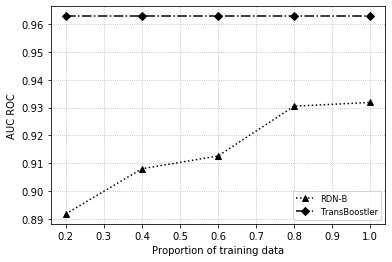

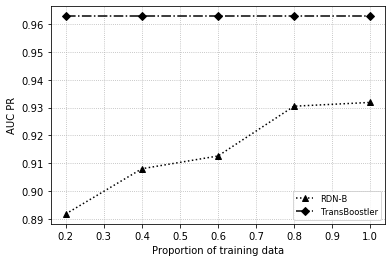

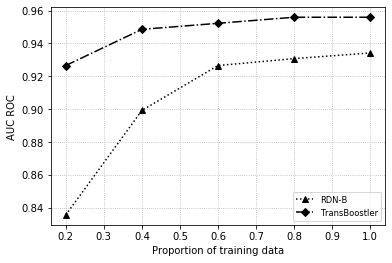

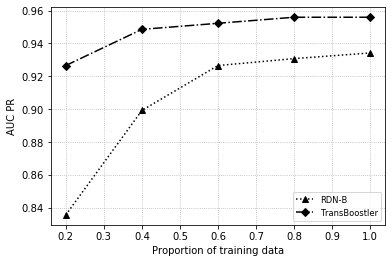

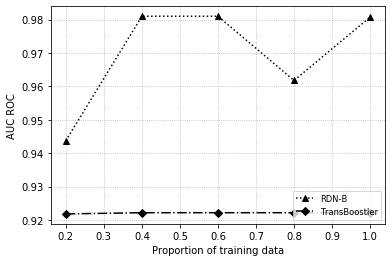

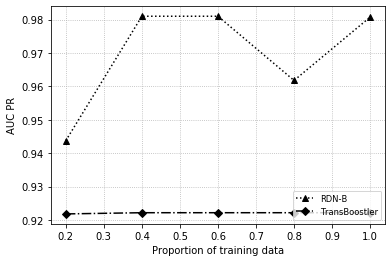

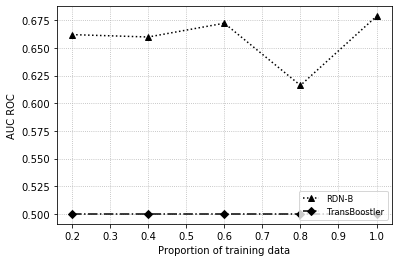

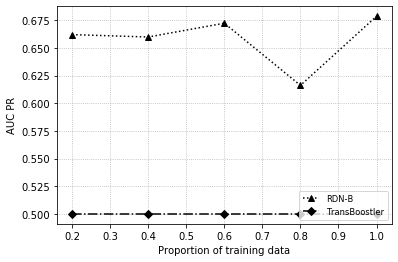

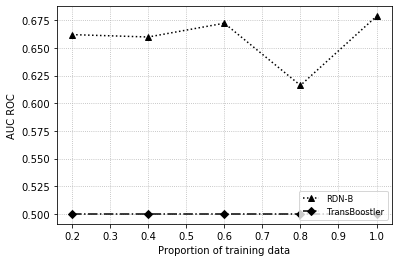

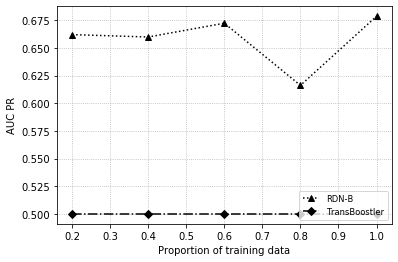

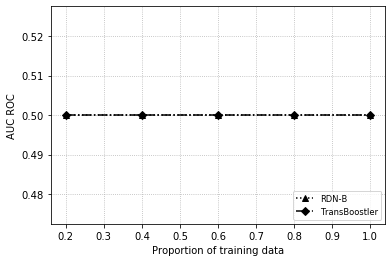

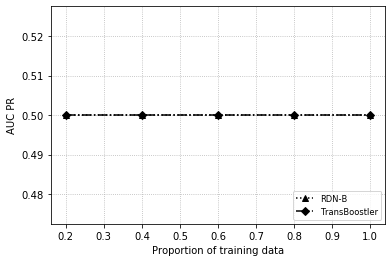

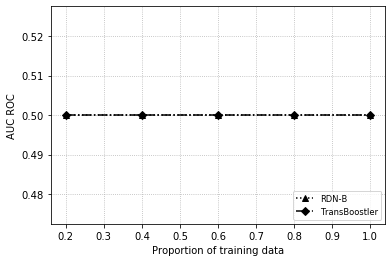

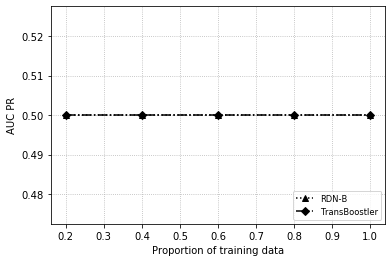

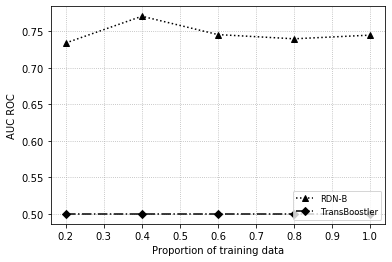

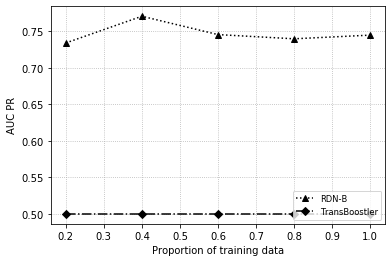

In [42]:
if not os.path.exists(os.getcwd() + '/figures'):
    os.makedirs(os.getcwd() + '/figures')
    os.makedirs(os.getcwd() + '/figures/AUC ROC')
    os.makedirs(os.getcwd() + '/figures/AUC PR')

for experiment in experiments:
    try:
        rdnb = {'AUC ROC': [], 'AUC PR': []}
        transfer_rdnb = {'AUC ROC': [], 'AUC PR': []}

        transfer_exp = pd.read_csv(experiment + '/trRDNB_curves.csv').set_index('Unnamed: 0')

        target = experiment.split('_')[-1]
        if(target in ['sports', 'finances']):
            target = 'nell_' + target
        rdnb_exp = pd.read_csv(os.getcwd() + '/experiments/RDNB/RDNB_{}_curves.csv'.format(target)).set_index('Unnamed: 0')

        for amount in ['0.2', '0.4', '0.6', '0.8', '1.0']:
            rdnb['AUC ROC'].append(float(rdnb_exp.loc['AUC ROC'][amount]))
            rdnb['AUC PR'].append(float(rdnb_exp.loc['AUC ROC'][amount]))

            transfer_rdnb['AUC ROC'].append(float(transfer_exp.loc['AUC ROC'][amount]))
            transfer_rdnb['AUC PR'].append(float(transfer_exp.loc['AUC ROC'][amount]))

        t = [0.2, 0.4, 0.6, 0.8, 1.0]
        fig, ax = plt.subplots()
        ax.plot(t, rdnb['AUC ROC'], '^-', linestyle=':', color='k', label='RDN-B')
        ax.plot(t, transfer_rdnb['AUC ROC'], 'D-', linestyle='-.', color='k', label='TransBoostler')
        #ax.plot(t, parameter_p, 's-', linestyle='--', color='k', label='trRDN-B')
        #ax.plot(t, transfer_p, 'x-', linestyle='-', color='k', label='trRDN-B Rev')

        ax.set(xlabel='Proportion of training data', ylabel='AUC ROC')
        ax.grid(linestyle = ':')
        ax.legend(loc='lower right', fontsize='small', frameon=True)
        plt.savefig(os.getcwd() + '/figures/AUC ROC/AUC_ROC_{}.pdf'.format(target))
        
        
        fig, ax = plt.subplots()
        ax.plot(t, rdnb['AUC PR'], '^-', linestyle=':', color='k', label='RDN-B')
        ax.plot(t, transfer_rdnb['AUC PR'], 'D-', linestyle='-.', color='k', label='TransBoostler')
        #ax.plot(t, parameter_p, 's-', linestyle='--', color='k', label='trRDN-B')
        #ax.plot(t, transfer_p, 'x-', linestyle='-', color='k', label='trRDN-B Rev')

        ax.set(xlabel='Proportion of training data', ylabel='AUC PR')
        ax.grid(linestyle = ':')
        ax.legend(loc='lower right', fontsize='small', frameon=True)
        plt.savefig(os.getcwd() + '/figures/AUC PR/AUC_PR_{}.pdf'.format(target))
    except FileNotFoundError as e:
        print(e)